In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
df=pd.read_csv('placement.csv')

In [3]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


# Step1: Check if the data is normally distributed or not?

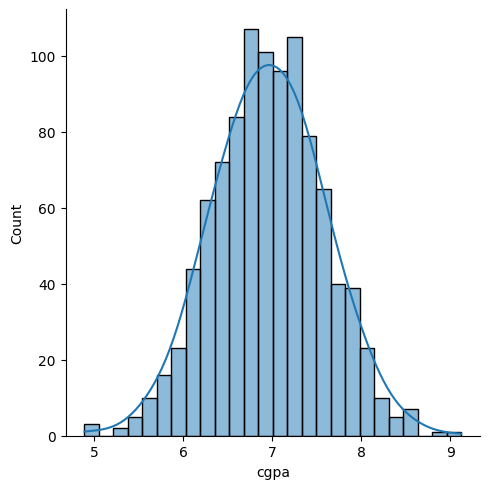

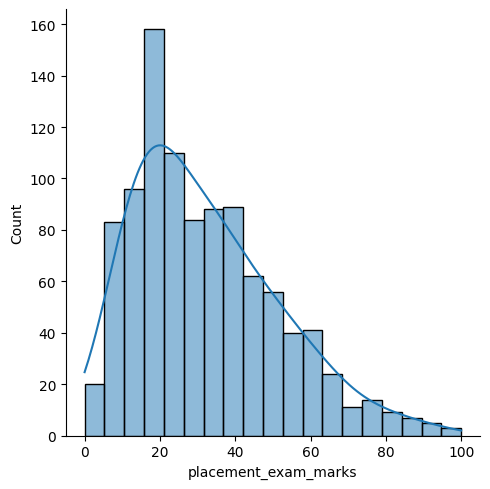

In [7]:
sns.displot(df['cgpa'],kde=True,kde_kws={'bw_adjust': 1.5})
sns.displot(df['placement_exam_marks'],kde=True,kde_kws={'bw_adjust': 1.5})
plt.show()

In [8]:
print("Mean value of cgpa",df['cgpa'].mean())
print("standar deviation(std) value of cgpa",df['cgpa'].std())
print("Max value of cgpa",df['cgpa'].max())
print("Min value of cgpa",df['cgpa'].min())

Mean value of cgpa 6.96124
standar deviation(std) value of cgpa 0.6158978751323896
Max value of cgpa 9.12
Min value of cgpa 4.89


# 2. Finding the limiting values:

In [10]:
max_value=df['cgpa'].mean()+3*df['cgpa'].std()
min_value=df['cgpa'].mean()-3*df['cgpa'].std()
print("Highest allowed value:",max_value)
print("lowest allowed value:",min_value)

Highest allowed value: 8.808933625397168
lowest allowed value: 5.113546374602832


# 3.Finding outliers:

In [14]:
df2=df[(df['cgpa']>max_value) | (df['cgpa']<min_value)]

In [15]:
df2

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


# 4.Trimming:

In [25]:
#trimming 
new_df=df[(df['cgpa']<max_value) & (df['cgpa']>min_value)]


In [26]:
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


### approach 2: calculating z score for each student

In [27]:
df['cgpa_zscore']=(df['cgpa']-df['cgpa'].mean())/df['cgpa'].std()

In [28]:
df

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
998,8.62,46.0,1,2.693239


In [29]:
#checking student for zscore>3
df[df['cgpa_zscore']>3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062


In [30]:
#checking student for zscore<-3
df[df['cgpa_zscore']<-3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [41]:
df[(df['cgpa_zscore']>3) | (df['cgpa_zscore']<-3)]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [39]:
new_df=df[(df['cgpa_zscore']<3) & (df['cgpa_zscore']>-3)]
new_df

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
991,7.04,57.0,0,0.127878
992,6.26,12.0,0,-1.138565
993,6.73,21.0,1,-0.375452
994,6.48,63.0,0,-0.781363


# 5.Capping:

In [42]:
upper_limit=df['cgpa'].mean()+3*df['cgpa'].std()
lower_limit=df['cgpa'].mean()-3*df['cgpa'].std()

In [43]:
df['cgpa']=np.where(
    df['cgpa']>upper_limit,
    upper_limit,
    np.where(
        df['cgpa']<lower_limit,
        lower_limit,
        df['cgpa']
    )
)

In [44]:
df.shape

(1000, 4)

In [45]:
df['cgpa'].describe()

count    1000.000000
mean        6.961499
std         0.612688
min         5.113546
25%         6.550000
50%         6.960000
75%         7.370000
max         8.808934
Name: cgpa, dtype: float64